1.	Outputs should not include any data from DAB Radio stations that have the following ‘NGR’ : NZ02553847, SE213515, NT05399374 and NT252675908
2.	The ‘EID’ column contains information of the DAB multiplex block E.g C19A. Extract this out into a new column, one for each of the following DAB multiplexes:
a.	all DAB multiplexes, that are , C18A, C18F, C188
b.	join each category, C18A, C18F, C188
to the ‘ NGR’ that signifies the DAB stations location to the following: ‘Site’, ‘Site Height, In-Use Ae Ht, In-Use ERP Total 
c.	Please note that: In-Use Ae Ht, In-Use ERP Total  will need the following new header after extraction: Aerial height(m), Power(kW) respectively.
3.	The client initially needs information to generate the following and output the results using appropriate representation:
a.	Produce the mean, mode and median for the ‘In-Use ERP Total’ from the extracted DAB multiplexes extracted earlier: C18A, C18F, C188
i.	For ‘Site Height’ more than 75
ii.	For ‘Date’ from 2001 onwards
4.	Produce a suitable graph that display the following information from the three DAB multiplexes that you extracted earlier: C18A, C18F, C188:  ‘Site’, ‘Freq’, ‘Block’, ‘Serv Label1’, ‘Serv Label2’, ‘Serv Label3’, ‘Serv label4’,’Serv Label10’ 
You may need to consider how you group this data to make visualisation feasible
5.	Determine if there is any significant correlation between the ‘Freq’, ‘Block’, ‘Serv Label1’, ‘Serv Label2’, ‘Serv Label3’, ‘Serv label4’,’Serv Label10’ used by the extracted DAB stations.  You will need to select an appropriate visualisation to demonstrate this.


C:\Users\User\AppData\Local\Temp\ipykernel_8640\669742215.py:32: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_merged['Power(kW)'] = df_merged['Power(kW)'].str.replace('.', '').str.replace(',', '.').astype(float)


For Site Height greater than 75, mean is 1705.98, median is 1000.0 and the mode is 300.0
For Date from 2001, mean is 907.605, median is 770.0 and the mode is 300.0


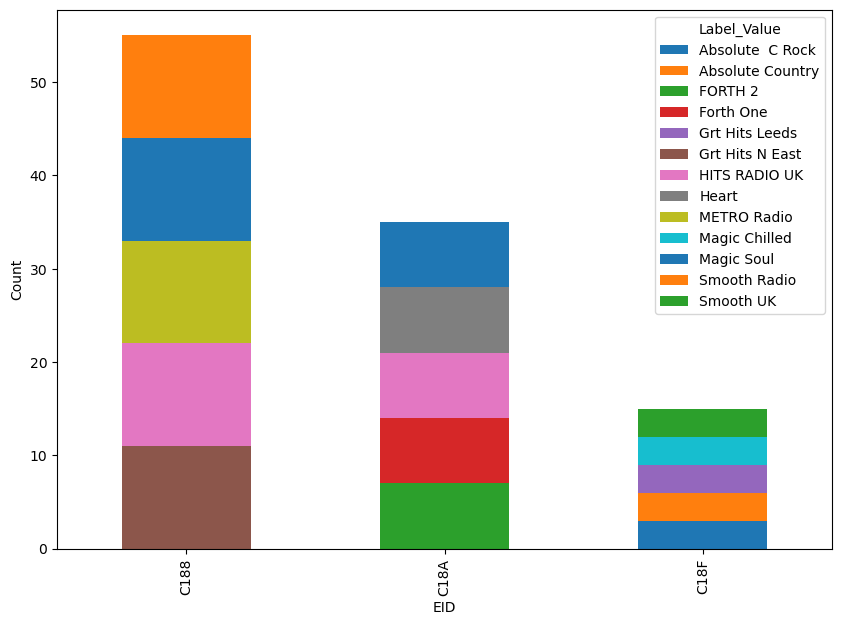

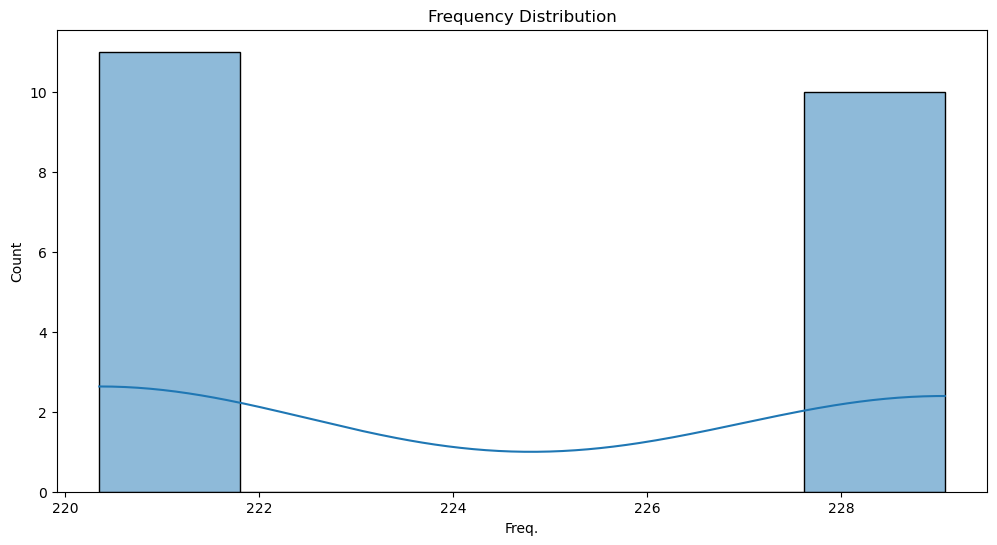

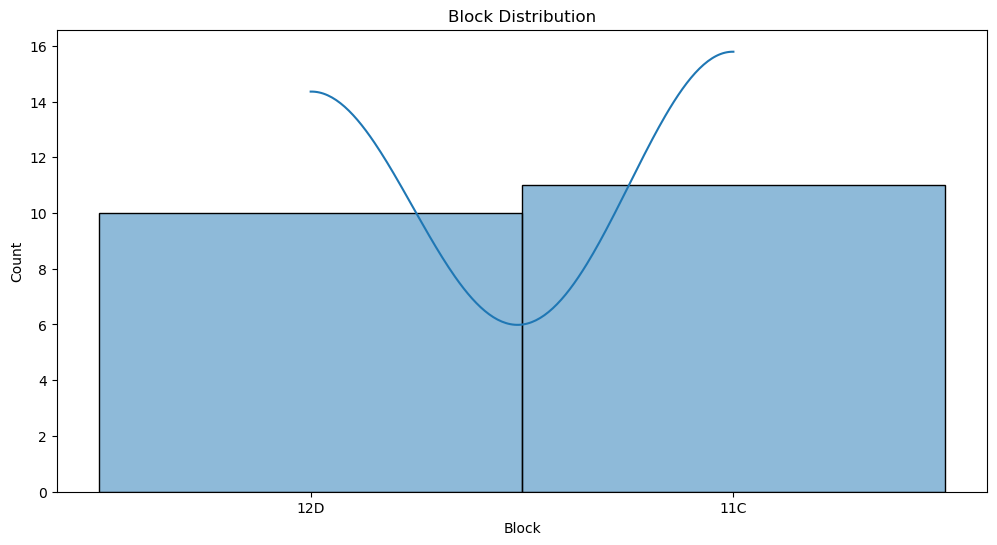

C:\Users\User\AppData\Local\Temp\ipykernel_8640\669742215.py:90: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df[['Freq.', 'Block', 'Serv Label1', 'Serv Label2', 'Serv Label3', 'Serv Label4', 'Serv Label10']].corr()


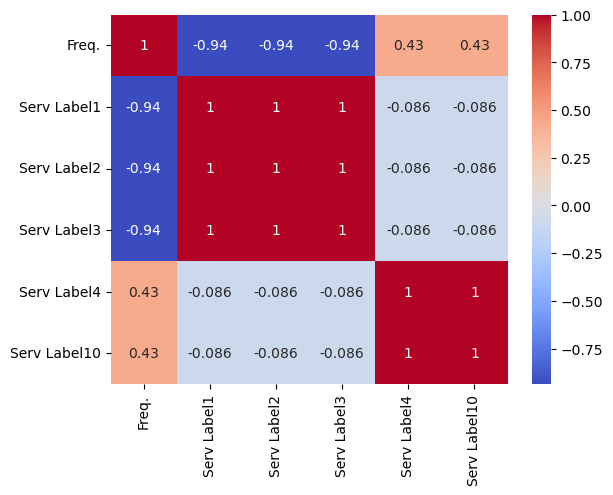

In [93]:
import tkinter as tk
from tkinter import ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

def load_csv_and_wrangle_antenna():
    #Read in file and check for empty data
    df = pd.read_csv('TxAntennaDAB.csv', na_values=' ')
    ngrs = ['NZ02553847', 'SE213515', 'NT05399374', 'NT252675908']
    df_filtered = df[~df['NGR'].isin(ngrs)]
    df_filtered.to_csv('Filtered_Antenna.csv', index=False)
    
    return df_filtered
    
    
def load_csv_and_wrangle_params():
    #Issue with encoding of the Params csv
    df = pd.read_csv('TxParamsDAB.csv',encoding='ISO-8859-1')
    df['Multiplex'] = df['EID'].str.extract('(C18A|C18F|C188)')
    df_filtered = df[df['Multiplex'].notnull()]
    
    return df_filtered

    
def merge_df(df1,df2):
    df_merged = pd.merge(df2, df1, on="id")
    df_merged = df_merged.rename(columns={'In-Use Ae Ht': 'Aerial height(m)', 'In-Use ERP Total': 'Power(kW)'})
    #Clean format of Power(kW) number
    df_merged['Power(kW)'] = df_merged['Power(kW)'].str.replace('.', '').str.replace(',', '.').astype(float)
    # Column names had a space after them
    df_merged.columns = df_merged.columns.str.strip()
    df_merged = df_merged[['id','Date','Ensemble','EID','Site','Site Height', 'Freq.','Block','Aerial height(m)','Power(kW)','Serv Label1','Serv Label2','Serv Label3','Serv Label4','Serv Label10', 'Lat','Long']]
    #Date format needs to be cleaned
    df_merged['Date'] = pd.to_datetime(df_merged['Date'], format='%d/%m/%Y')
    
    df_merged.to_csv('merged.csv', index=False)
    
    return df_merged
    
def analysis_MMM(df):
    df_siteHeight = df[df['Site Height'] > 75] 
    mean_value_siteHeight = df_siteHeight['Power(kW)'].mean().round(3)
    median_value_siteHeight = df_siteHeight['Power(kW)'].median()
    mode_value_siteHeight = df_siteHeight['Power(kW)'].mode().iloc[0] 
    
    df_date = df[df['Date'] > '2001-01-01'] 
    mean_value_date = df_date['Power(kW)'].mean().round(3)
    median_value_date = df_date['Power(kW)'].median()
    mode_value_date = df_date['Power(kW)'].mode().iloc[0] 
    
    siteHeightResults = f'For Site Height greater than 75, mean is {mean_value_siteHeight}, median is {median_value_siteHeight} and the mode is {mode_value_siteHeight}'
    dateResults = f'For Date from 2001, mean is {mean_value_date}, median is {median_value_date} and the mode is {mode_value_date}'
    print(siteHeightResults)
    print(dateResults)
    
def graphs(df):
    df_melted = df.melt(id_vars='EID', value_vars=['Serv Label1','Serv Label2','Serv Label3','Serv Label4','Serv Label10'], var_name='Service_Label', value_name='Label_Value')
    # Get counts for each EID - Label_Value combination
    df_grouped = df_melted.groupby(['EID','Label_Value']).size().unstack()
    # Plot stacked bar chart
    df_grouped.plot(kind='bar', stacked=True, figsize=(10,7))
    plt.ylabel('Count')
    plt.show()

    # Plotting distribution of frequency
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df, x="Freq.", kde=True)
    plt.title('Frequency Distribution')
    plt.show()

    # Plotting distribution of Block
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df, x="Block", kde=True)
    plt.title('Block Distribution')
    plt.show()
    
    
def correlation(df):
    labels_mapping = {label: idx for idx, label in enumerate(pd.concat([df['Serv Label1'], df['Serv Label2'], df['Serv Label3'], df['Serv Label4'], df['Serv Label10']]).unique())}

    df['Serv Label1'] = df['Serv Label1'].map(labels_mapping)
    df['Serv Label2'] = df['Serv Label2'].map(labels_mapping)
    df['Serv Label3'] = df['Serv Label3'].map(labels_mapping)
    df['Serv Label4'] = df['Serv Label4'].map(labels_mapping)
    df['Serv Label10'] = df['Serv Label10'].map(labels_mapping)

    correlation_matrix = df[['Freq.', 'Block', 'Serv Label1', 'Serv Label2', 'Serv Label3', 'Serv Label4', 'Serv Label10']].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.show()

    
    
    
dfAntenna = load_csv_and_wrangle_antenna()
dfParams = load_csv_and_wrangle_params()
mergeDF = merge_df(dfAntenna,dfParams)
analysis_MMM(mergeDF)
graphs(mergeDF)
correlation(mergeDF)